# July 8th, Python Session, Ian Stephens
Dealing with FITS files.

import important packages

In [ ]:
from astropy.io import fits
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
import copy

Read in a fits file

In [ ]:
fits_filename = "lmc.ha.b20.fits"
hdulist = fits.open(fits_filename)

check information about hdulist

In [ ]:
hdulist.info()

-The info indicates that the header information and data is stored at index 0. Sometimes this is not the case!
-The Dimensions indicates that the data is a 540 by 540 matrix. Each matrix point has a numerical value.
-Cards is the amount of lines in the header (described below)

A typical fits file has both a "header" and "data". Some fits files will have multiple header/data combinations, which can be seen in hdulist.info(). As seen above, we only have one set of header/data, at index 0

# Header
The header describes the data. For image data, like this one, the header gives information on the angular size of the pixels, and coordinates of the reference pixel.

Let's see what the header looks like. Recall, the data in hdulist is at index 0, which is seen in the square brackets below:

In [ ]:
hdulist[0].header

Alternatively, we can access the header using getdata. This can be nice since we do not have to specify the index

In [ ]:
fits.getheader(fits_filename)

This is a lot of info! Most we don't even care about. Let's store the header for later use

In [ ]:
header = hdulist[0].header

Header keywords are accessed using the header attribute, which acts like a Python dictionary.
Below are some ways to access header information

In [ ]:
header['NAXIS1']

In [ ]:
header['DATE'] #date observations were taken

In [ ]:
header[13] #keyword of 14 object (remember, indexing starts at 0)

In [ ]:
header['OBJECT'] #information of what the observations are... more on this later!

In [ ]:
#update existing header information
header['OBJECT'] = 'LMC Ha MCELS Mosaic, edited by ME!'
header['OBJECT']

In [ ]:
#add more information to header
header["MYCOMMENT"]="I am making this image cool!"
header["MYCOMMENT"]

In [ ]:
#history and comments can be added automatically
header.add_history("Updated July 27, 2017")
header.add_comment("Astronomy is cool")

In [ ]:
header #reprint to see changes

# Data
Let's check out what's in the 540x540 matrix Again, we can access the data one of two ways:

In [ ]:
hdulist[0].data

In [ ]:
fits.getdata(fits_filename)

Why are we getting a bunch of zeroes? Because the matrix is too large for this screen to display! Let's store the image data. If you really want to see all the data, you can use np.set_printoptions(threshold='nan'), but this can take a bit to print sometimes!

Let's store the data into image. Recall image is just a matrix.

In [ ]:
image = hdulist[0].data

In [ ]:
image[20]

In [ ]:
image[20][100]

Ok, let's show the images with matplotlib!!! First show the image, then let's adjust the scale

In [ ]:
plt.imshow(image)

Cannot tell much from that! Let's adjust the color scale.

In [ ]:
plt.imshow(image,vmin=0.1,vmax=3.5)

There we go! This is the Large Magellanic Cloud, which is a satellite galaxy of the Milky Way. It is one of the closest galaxies to the Milky Way, located 50 kpc (160,000 light years) away. If you ever are in the southern hemisphere, look for a large-looking cloud toward the south. You can see the Large Magellanic Cloud (and his buddy, the Small Magellanic Cloud) with the naked eye in a clear sky - and it's bigger than the moon! For this particular image, we are looking at the photons that trace the ionized gas in the large Magellanic Cloud. The emission you see is due to high-mass stars (greater than about 8 times the mass of our sun - objects which will eventually go supernova!).

You can edit axes using standard matplotlib code. Refer to previous lecture: "Making pretty pictures and pandas aren't always bears.ipynb"  or  https://matplotlib.org/api/pyplot_api.html

There's still a lot of things we can do to fine-tune. For one, the x and y axis are in pixels, when we are usually interested in arcseconds or degrees. Also, python puts the origin in the top left, when we really want the origin at the bottom left. The code below puts the origin in bottom left and puts the axes in degrees.

In [ ]:
n1 = header['NAXIS1']
n2 = header['NAXIS2']
dx = np.abs(header['CDELT1'])
dy = np.abs(header['CDELT2'])

plt.imshow(image,vmin=0.1,vmax=3.5, origin='lower', extent=[0., n1*dx, 0., n2*dy])

Let's modify the image and re-save it. Let's say we only want part of the image. Let's trim the outer 150 pixels

In [ ]:
image2 = []
for i in range(n1):
    if i<150 or i>390:
        continue
    newvector = []
    for j in range(n2):
        if j<150 or j>390:
            continue
        else:
            newvector.append(image[i][j])
    image2.append(newvector)

In [ ]:
len(image2[43])

In [ ]:
#let's also update the header. The length of the axes, which is stored in header info NAXIS1 and NAXIS2, have now been modified!
header2=copy.copy(header)
header2['NAXIS1']=len(image2)
header2['NAXIS2']=len(image2[0]) #any index of image2 should work

In [ ]:
n1_2 = header2['NAXIS1']
n2_2 = header2['NAXIS2']
plt.imshow(image2,vmin=0.1,vmax=3.5, origin='lower', extent=[0., n1_2*dx/3600, 0., n2_2*dy/3600])

In [ ]:
#write it out; clobber option overwrites image if it already exists
fits.writeto("lmc.ha.b20_cutout.fits",image2,header2,clobber=True) 

You now should have a cutout of the fits in your directory!


Now do it yourself!!! Open 'co_m0.fits' and display it.

# aplpy
If you want to make pretty images or publishable images with python, aplpy is strongly recommended
A great tutorial can be found here: https://aplpy.readthedocs.io/en/latest/fitsfigure/quickstart.html
While making images as mentioned above is less useful, if you want to create or make modifications to fits files themselves, this tutorial is what you want!

In [ ]:
#install if necessary
pip install aplpy

/Users/istephens/anaconda2/lib/python3.7/site-packages/aplpy/core.py:14: MatplotlibDeprecationWarning: 
The mpl_toolkits.axes_grid module was deprecated in Matplotlib 2.1 and will be removed two minor releases later. Use mpl_toolkits.axes_grid1 and mpl_toolkits.axisartist, which provide the same functionality instead.
  import mpl_toolkits.axes_grid.parasite_axes as mpltk
the RADECSYS keyword is deprecated, use RADESYSa. [astropy.wcs.wcs]
/Users/istephens/anaconda2/lib/python3.7/site-packages/aplpy/normalize.py:92: MatplotlibDeprecationWarning: 
The iterable function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use np.iterable instead.
  if cbook.iterable(value):


INFO: Auto-setting vmin to -5.335e-01 [aplpy.core]
INFO: Auto-setting vmax to  1.166e+01 [aplpy.core]


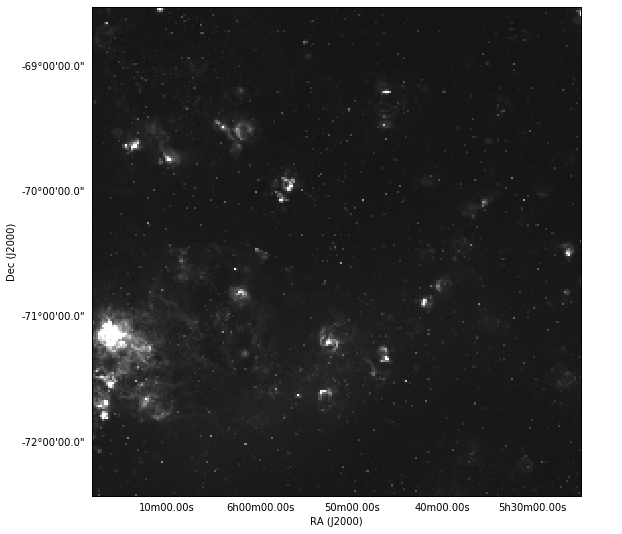

In [1]:
import aplpy
import matplotlib.pyplot as plt
%matplotlib inline


f1 = aplpy.FITSFigure('lmc.ha.b20_cutout.fits')
f1.show_grayscale()

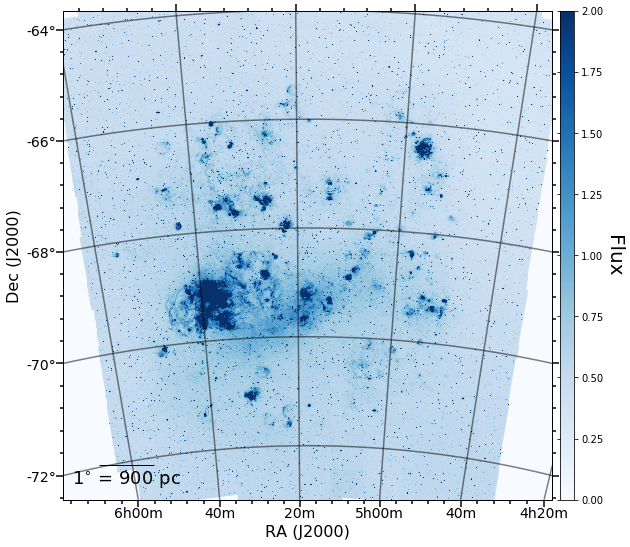

In [7]:
f1 = aplpy.FITSFigure('lmc.ha.b20.fits')
#f1.show_grayscale()
#let's make it in color instead of grayscale
f1.show_colorscale(cmap='Blues',vmin=0,vmax=2)

#add scalebar that shows the size-scale
f1.add_scalebar(1,"1$^{\circ}$ = 900 pc",color="black",corner='bottom left')
f1.scalebar.set_font_size(18)

#let's get rid of extra 0s on axis labels
f1.tick_labels.set_xformat('hh:mm')
f1.tick_labels.set_yformat('dd')

#make tick labels look good
f1.ticks.set_color('k')
f1.ticks.set_linewidth(1.5)
f1.set_axis_labels_size(16)
f1.set_tick_labels_size(14)

#add a color-bar on right, label it, set its font size and label direction, and set the spacing so it lookg good
f1.show_colorbar()
f1.colorbar.set_axis_label_text("Flux")
f1.colorbar.set_axis_label_font(size=20)
f1.colorbar.set_axis_label_rotation(-90)
f1.colorbar.set_pad(0.1)
f1.colorbar.set_axis_label_pad(20)

#add a grid; this grid is primarily useful for very large images where the curvature of the sky is significant
f1.show_grid()
f1.set_grid_color('k')
f1.savefig('lmc_fun.png')